In [3]:
import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.tree import export_graphviz
import graphviz

In [30]:
 
import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.tree import export_graphviz
import graphviz

In [4]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [5]:
%cd /content/drive/MyDrive

/content/drive/MyDrive


In [6]:
dataset=pd.read_csv("weather.csv")

In [7]:
dataset

,outlook,temperature,humidity,windy,play
0,overcast,hot,high,False,yes
1,overcast,cool,normal,True,yes
2,overcast,mild,high,True,yes
3,overcast,hot,normal,False,yes
4,rainy,mild,high,False,yes
5,rainy,cool,normal,False,yes
6,rainy,cool,normal,True,no
7,rainy,mild,normal,False,yes
8,rainy,mild,high,True,no
9,sunny,hot,high,False,no


 Encoding the outlook column 
 conver to numerical data not to categerical one  

In [8]:

le= LabelEncoder()
dataset_encoded = dataset.iloc[:,0:5]
le.fit_transform(dataset_encoded['outlook'])


array([0, 0, 0, 0, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2])

In [9]:
print(dataset_encoded)
print(dataset)

     outlook temperature humidity  windy play
0   overcast         hot     high  False  yes
1   overcast        cool   normal   True  yes
2   overcast        mild     high   True  yes
3   overcast         hot   normal  False  yes
4      rainy        mild     high  False  yes
5      rainy        cool   normal  False  yes
6      rainy        cool   normal   True   no
7      rainy        mild   normal  False  yes
8      rainy        mild     high   True   no
9      sunny         hot     high  False   no
10     sunny         hot     high   True   no
11     sunny        mild     high  False   no
12     sunny        cool   normal  False  yes
13     sunny        mild   normal   True  yes
     outlook temperature humidity  windy play
0   overcast         hot     high  False  yes
1   overcast        cool   normal   True  yes
2   overcast        mild     high   True  yes
3   overcast         hot   normal  False  yes
4      rainy        mild     high  False  yes
5      rainy        cool   normal 

**#Encoding the columns**


In [10]:

#iloc extract data from the data frames(columns) clums

le=LabelEncoder()
dataset_encoded=dataset.iloc[:,0:5]

for i in dataset_encoded:
  dataset_encoded[i]=le.fit_transform(dataset_encoded[i])

In [11]:
print(dataset_encoded)
print(dataset)

    outlook  temperature  humidity  windy  play
0         0            1         0      0     1
1         0            0         1      1     1
2         0            2         0      1     1
3         0            1         1      0     1
4         1            2         0      0     1
5         1            0         1      0     1
6         1            0         1      1     0
7         1            2         1      0     1
8         1            2         0      1     0
9         2            1         0      0     0
10        2            1         0      1     0
11        2            2         0      0     0
12        2            0         1      0     1
13        2            2         1      1     1
     outlook temperature humidity  windy play
0   overcast         hot     high  False  yes
1   overcast        cool   normal   True  yes
2   overcast        mild     high   True  yes
3   overcast         hot   normal  False  yes
4      rainy        mild     high  False  yes
5   

 **columns used to make predictions** 

In [22]:
column_names=dataset_encoded.iloc[:,0:4].columns
column_names

Index(['outlook', 'temperature', 'humidity', 'windy'], dtype='object')

In [12]:


x=dataset_encoded.iloc[:,0:4].values
x

#X contains the all the columns 

array([[0, 1, 0, 0],
       [0, 0, 1, 1],
       [0, 2, 0, 1],
       [0, 1, 1, 0],
       [1, 2, 0, 0],
       [1, 0, 1, 0],
       [1, 0, 1, 1],
       [1, 2, 1, 0],
       [1, 2, 0, 1],
       [2, 1, 0, 0],
       [2, 1, 0, 1],
       [2, 2, 0, 0],
       [2, 0, 1, 0],
       [2, 2, 1, 1]])

**#columns of data we want to predict**

In [13]:

y=dataset_encoded.iloc[:,4].values
y

array([1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1])

**split data set to training test and testing set**

In [14]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=42)

**Create the decision tree and fit it into the training data**

In [15]:
model=DecisionTreeClassifier(criterion='gini',max_depth=5)
model.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=5)

 **Prediction**  

In [23]:
model.predict([(0,0,0,0)])

#can go for a play

array([1])

Predict the input of outlook=overcast, temerature=hot, humidity=high, windy=strong-->yes

In [17]:
model.predict([(0,1,0,1)])

array([1])

#calculating  the accuracy


In [26]:
model.score(x_test, y_test)


0.4

#plot the decision tree

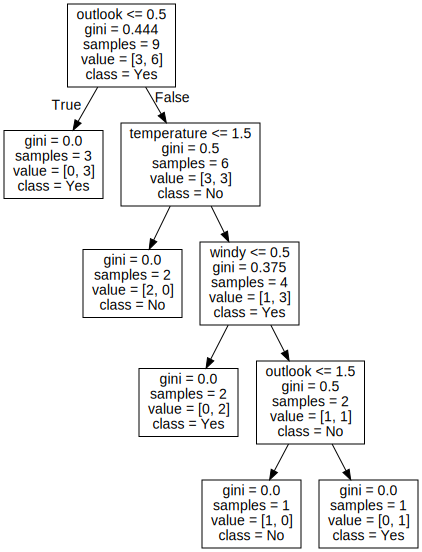

In [33]:
dot_data = tree.export_graphviz(model,out_file="mytree.dot", feature_names = dataset.columns[0:4],class_names=["No","Yes"])

with open("mytree.dot") as f:
  dot_graph=f.read()
graphviz.Source(dot_graph)

#child node gini index is 0
#it is lower gini value, perfect split


In [35]:
 #plot the decision tree
dot_data = tree.export_graphviz(model, out_file=None, feature_names=column_names, class_names=["No","Yes"],
      filled=True, rounded=True, special_characters=True)
graph = graphviz.Source(dot_data)
graph.render('dtree_render',view=True)

'dtree_render.pdf'